In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
from scipy.stats import norm
import os

In [48]:
covariance_type = "full"    # "full", "tied", "diag", "spherical"
n_components = 3
result_dir = f"/workspace/results/hw/{covariance_type}"
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

In [49]:
iris = load_iris()
X = iris.data  # iris 数据集的特征
print(iris.feature_names)
X[:5]  # iris 数据集的前5行数据

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [50]:
# 设定组件数为 3
gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
gmm.fit(X)
labels = gmm.predict(X)

In [51]:
gmm.covariances_

array([[[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.2755171 , 0.09662295, 0.18547072, 0.05478901],
        [0.09662295, 0.09255152, 0.09103431, 0.04299899],
        [0.18547072, 0.09103431, 0.20235849, 0.06171383],
        [0.05478901, 0.04299899, 0.06171383, 0.03233775]],

       [[0.38744093, 0.09223276, 0.30244302, 0.06087397],
        [0.09223276, 0.11040914, 0.08385112, 0.05574334],
        [0.30244302, 0.08385112, 0.32589574, 0.07276776],
        [0.06087397, 0.05574334, 0.07276776, 0.08484505]]])

In [52]:
# 输出每个组件的均值、方差和权重
# [num_components, num_features]
means = []
covs = []
weights = []
print("高斯混合模型的组件参数:")
for i in range(gmm.n_components):
    print(f"\n组件 {i+1}:")
    print(f"权重: {gmm.weights_[i]}")
    weights.append(gmm.weights_[i])
    print(f"均值: {gmm.means_[i]}")
    means.append(gmm.means_[i])
    if covariance_type in ["tied", "diag"]:   # 只展示对角线元素作为方差
        print(f"协方差矩阵: {gmm.covariances_[i]}")
        covs.append(gmm.covariances_[i])
    elif covariance_type == "spherical":
        print(f"协方差矩阵: {gmm.covariances_[i]}")
        covs.append([gmm.covariances_[i]] * len(gmm.means_[i]))
    else:
        print(f"协方差矩阵: {np.diag(gmm.covariances_[i])}")
        covs.append(np.diag(gmm.covariances_[i]))


高斯混合模型的组件参数:

组件 1:
权重: 0.33333333333333326
均值: [5.006 3.428 1.462 0.246]
协方差矩阵: [0.121765 0.140817 0.029557 0.010885]

组件 2:
权重: 0.3012709216583503
均值: [5.9170732  2.77804839 4.20540364 1.29848217]
协方差矩阵: [0.2755171  0.09255152 0.20235849 0.03233775]

组件 3:
权重: 0.3653957450083165
均值: [6.54639415 2.94946365 5.48364578 1.98726565]
协方差矩阵: [0.38744093 0.11040914 0.32589574 0.08484505]


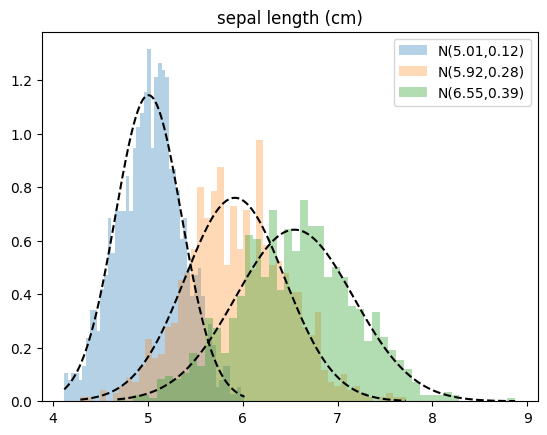

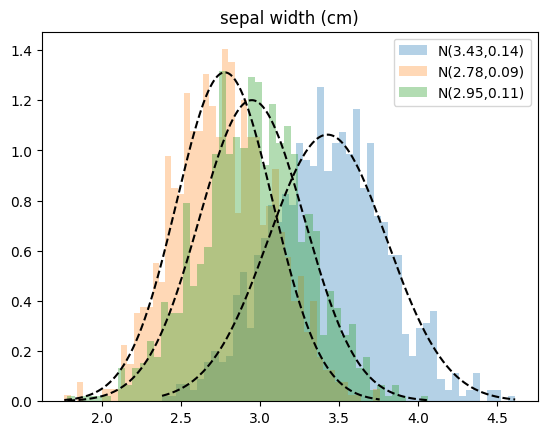

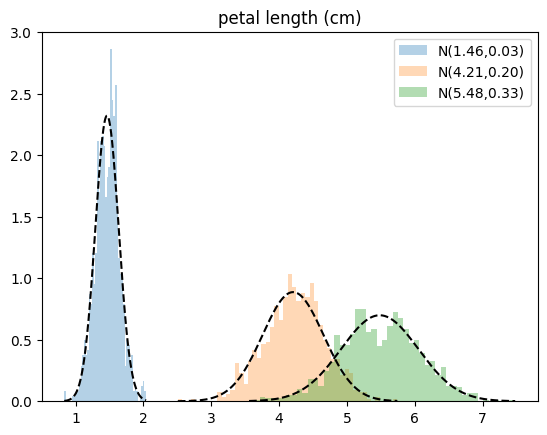

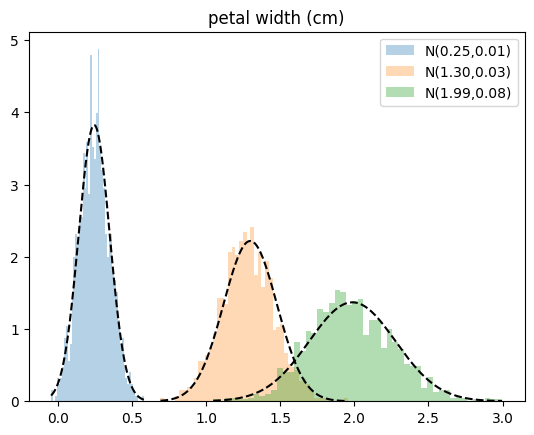

In [53]:
def plot_pdf(mu,sigma,label,alpha=0.5,linestyle='k--',density=True):
    """
    Plot 1-D data and its PDF curve.

    """
    # Compute the mean and standard deviation of the data

    # Plot the data
    
    X=norm.rvs(mu, sigma, size=1000)
    
    plt.hist(X, bins=50, density=density, alpha=alpha,label=label)

    # Plot the PDF
    x=np.linspace(X.min(), X.max(), 1000)
    y=norm.pdf(x, mu, sigma)
    plt.plot(x, y, linestyle)

for i in range(len(iris.feature_names)):
    for mu, virance, weight in zip(means, covs, weights):
        plot_pdf(mu[i],np.sqrt(virance[i]),label=f'N({mu[i]:.2f},{virance[i]:.2f})',alpha=weight)
    plt.legend()
    plt.title(f"{iris.feature_names[i]}")
    plt.savefig(f'{result_dir}/gmm_{covariance_type}_iris_{iris.feature_names[i]}.png')
    plt.show()